In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, KFold , GridSearchCV
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import RocCurveDisplay, roc_curve
from sklearn import metrics
import seaborn as sns
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score

In [117]:
# importação do conjunto de dados

arquivo_excel = 'telco_customer_churn.xlsx'

# Lendo o arquivo Excel
df = pd.read_excel(arquivo_excel)


In [118]:
# selecionando amostra aleatória
amostra = df.sample(frac=0.8, random_state=999)
amostra['Churn'].value_counts()
amostra.shape

(5634, 21)

In [119]:
# conjunto de dados que não fez parte da amostra
n_amostra = df[~df['customerID'].isin(amostra['customerID'])]
n_amostra.shape

(1409, 21)

In [121]:
# separando variáveis explicativas e resposta
X = amostra [[ 'Contract', 'SeniorCitizen',  'Partner',  'Dependents',   'DeviceProtection',   'gender','MonthlyCharges', 'TotalCharges']]
y = amostra [['Churn']]
numerical_cols = ['MonthlyCharges', 'TotalCharges']


In [122]:
# Dividir em treino e teste

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=495)

# transformar categoria em número 
y_train['Churn'] = np.where(y_train['Churn'] == 'Yes', 1, 0)
y_test['Churn'] = np.where(y_test['Churn'] == 'Yes', 1, 0)
y_test['Churn'].value_counts()

Churn
0    1276
1     696
Name: count, dtype: int64

In [123]:
# gerando as variáveis dummies (das categóricas) - treino
categorical_dummies = pd.get_dummies(X_train.drop(['MonthlyCharges', 'TotalCharges'], axis=1), drop_first=True)
categorical_dummies = categorical_dummies.applymap(lambda x: 1 if x else 0)
X_train2 = pd.concat([categorical_dummies, X_train[numerical_cols]], axis=1)

y_train
y_train['Churn'].value_counts()

C:\Users\re048225\AppData\Local\Temp\ipykernel_20964\1068921752.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  categorical_dummies = categorical_dummies.applymap(lambda x: 1 if x else 0)


Churn
0    2353
1    1309
Name: count, dtype: int64

In [125]:
# gerando as variáveis dummies (das categóricas) - teste
categorical_dummies2 = pd.get_dummies(X_test.drop(['MonthlyCharges', 'TotalCharges'], axis=1), drop_first=True)
categorical_dummies2 = categorical_dummies2.applymap(lambda x: 1 if x else 0)
X_test2 = pd.concat([categorical_dummies2, X_test[numerical_cols]], axis=1)
#X_train2 = X_train2.applymap(lambda x: 1 if x else 0)



C:\Users\re048225\AppData\Local\Temp\ipykernel_20964\1310748415.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  categorical_dummies2 = categorical_dummies2.applymap(lambda x: 1 if x else 0)


In [126]:
# base de validação
X_valid = n_amostra [[ 'Contract', 'SeniorCitizen',  'Partner',  'Dependents',   'DeviceProtection',   'gender','MonthlyCharges', 'TotalCharges']]
y_valid = n_amostra [['Churn']]


In [127]:
# gerando as variáveis dummies (das categóricas) - validacao
categorical_dummies3 = pd.get_dummies(X_valid.drop(['MonthlyCharges', 'TotalCharges'], axis=1), drop_first=True)
categorical_dummies3 = categorical_dummies3.applymap(lambda x: 1 if x else 0)
X_valid2 = pd.concat([categorical_dummies3, X_valid[numerical_cols]], axis=1)
y_valid['Churn'] = np.where(y_valid['Churn'] == 'Yes', 1, 0)

C:\Users\re048225\AppData\Local\Temp\ipykernel_20964\491269437.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  categorical_dummies3 = categorical_dummies3.applymap(lambda x: 1 if x else 0)
C:\Users\re048225\AppData\Local\Temp\ipykernel_20964\491269437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y_valid['Churn'] = np.where(y_valid['Churn'] == 'Yes', 1, 0)


In [128]:
# treinamento com modelo random forest

rf_model = RandomForestClassifier(random_state=56)
rf_model.fit(X_train2, y_train)

forest = rf_model.predict(X_test2)

# Avaliar o modelo
accuracy = accuracy_score(y_test, forest)
precision = precision_score(y_test, forest)
recall = recall_score(y_test, forest)
f1 = f1_score(y_test, forest)

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

C:\Users\re048225\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Acurácia: 0.59
Precisão: 0.39
Recall: 0.26
F1-Score: 0.31


In [129]:
# Random Forest - validação
forest_valid = rf_model.predict(X_valid2)

# Avaliar o modelo
accuracy = accuracy_score(y_valid, forest_valid)
precision = precision_score(y_valid, forest_valid)
recall = recall_score(y_valid, forest_valid)
f1 = f1_score(y_valid, forest_valid)

print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.59
Precisão: 0.37
Recall: 0.31
F1-Score: 0.33


Após testar o modelo random forest, tanto na base de teste como validação, pôde-se observar as principais métricas, vendo que acurácia em ambos resultados ficam em torno de 0.59, precisão em torno de 0.39 e F-score um pouco acima dos 0.30

In [131]:
# Criar e treinar o modelo de Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train2, y_train)

# Fazer previsões
tree = model.predict(X_test2)

# Avaliar o modelo
accuracy = accuracy_score(y_test, tree)
precision = precision_score(y_test, tree)
recall = recall_score(y_test, tree)
f1 = f1_score(y_test, tree)

# Exibir métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.56
Precisão: 0.37
Recall: 0.37
F1-Score: 0.37


In [132]:
# Fazer previsões
tree_valid = model.predict(X_valid2)

# Avaliar o modelo
accuracy = accuracy_score(y_valid, tree_valid)
precision = precision_score(y_valid, tree_valid)
recall = recall_score(y_valid, tree_valid)
f1 = f1_score(y_valid, tree_valid)

# Exibir métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.56
Precisão: 0.35
Recall: 0.39
F1-Score: 0.37


Após testar o modelo decision tree, tanto na base de teste como validação, pôde-se observar as principais métricas, vendo que acurácia em ambos resultados ficam em torno de 0.56 (sendo valores menores), precisão em torno de 0.35 e F-score em torno de 0.37.

In [ ]:
# Criar e treinar o modelo XGBoost

model_xb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
model_xb.fit(X_train2, y_train)

# Fazer previsões
boosting = model_xb.predict(X_test2)
# Avaliar o modelo
accuracy = accuracy_score(y_test, boosting)
precision = precision_score(y_test, boosting)
recall = recall_score(y_test, boosting)
f1 = f1_score(y_test, boosting)

# Exibir métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

C:\Users\re048225\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\training.py:199: UserWarning: [10:49:56] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Acurácia: 0.60
Precisão: 0.39
Recall: 0.27
F1-Score: 0.32


In [134]:
# Fazer previsões validacao
boosting_valid = model_xb.predict(X_valid2)
# Avaliar o modelo
accuracy = accuracy_score(y_valid, boosting_valid)
precision = precision_score(y_valid, boosting_valid)
recall = recall_score(y_valid, boosting_valid)
f1 = f1_score(y_valid, boosting_valid)

# Exibir métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.61
Precisão: 0.38
Recall: 0.29
F1-Score: 0.33


O modelo Xgboost apresentou resultados similares em ambos conjuntos de dados, no entanto, tais resultados foram similares ao do modelo random forest.

In [145]:
# Criando e treinando o modelo Naive Bayes

model_bayes = GaussianNB()
model_bayes.fit(X_train2, y_train)

# Fazendo previsões
y_bayesiano = model_bayes.predict(X_test2)

# Avaliar o modelo
accuracy = accuracy_score(y_test, y_bayesiano)
precision = precision_score(y_test, y_bayesiano)
recall = recall_score(y_test, y_bayesiano)
f1 = f1_score(y_test, y_bayesiano)

# Exibir métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.59
Precisão: 0.43
Recall: 0.53
F1-Score: 0.48


C:\Users\re048225\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
# Fazendo previsões
y_bayesiano_valid = model_bayes.predict(X_valid2)

# Avaliar o modelo
accuracy = accuracy_score(y_valid, y_bayesiano_valid)
precision = precision_score(y_valid, y_bayesiano_valid)
recall = recall_score(y_valid, y_bayesiano_valid)
f1 = f1_score(y_valid, y_bayesiano_valid)

# Exibir métricas
print(f"Acurácia: {accuracy:.2f}")
print(f"Precisão: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

Acurácia: 0.60
Precisão: 0.43
Recall: 0.54
F1-Score: 0.48


O modelo baysiano apresentou resultados similares em ambos conjuntos de dados, e resultados mais elevados, comparados aos demais modelos. Pode-se observar que a precisão ficou em 0.43, Recall 0.53 e F1-Score 0.48.

In [ ]:
class_index = 1  # Class to filter
means_class_1 = model_bayes.theta_[class_index]

# Create a DataFrame with feature names and their means
df_means = pd.DataFrame({
    "Feature": importance_df['Feature'],
    "Mean_Class_1": means_class_1
})

print(df_means)


                                Feature  Mean_Class_1
7                           gender_Male      0.141329
3                           Partner_Yes      0.129870
6                  DeviceProtection_Yes      0.129106
9                          TotalCharges      0.498854
8                        MonthlyCharges      0.281131
4                        Dependents_Yes      0.273491
0                         SeniorCitizen      0.267380
5  DeviceProtection_No internet service      0.506494
2                     Contract_Two year     69.269817
1                     Contract_One year   2465.417548


No Naive Bayes, não é calculada as Feature importance diretamente. No entanto, é possível inferir a importância das características analisando as probabilidades condicionais ou os pesos associados a cada característica. Sendo assim, é possível analisar média (theta_) e a variância (sigma_) de cada característica para cada classe.

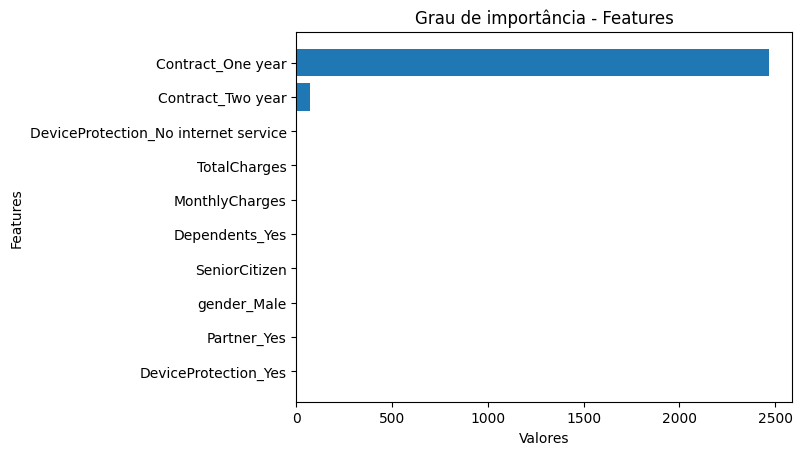

In [162]:
# Criando o gráfico de barras
df_means = df_means.sort_values(by='Mean_Class_1', ascending=True)
plt.barh(df_means['Feature'], df_means['Mean_Class_1'])
plt.xlabel('Valores')
plt.ylabel('Features')
plt.title('Grau de importância - Features')
plt.show()

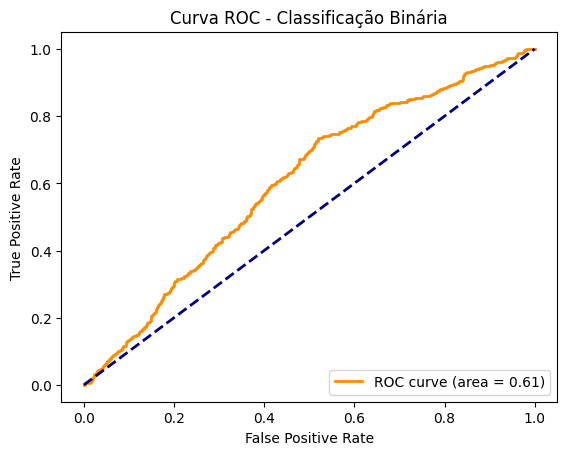

In [163]:
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

# Previsões de probabilidade
y_score = model_bayes.predict_proba(X_test2)[:, 1]

# Calcular a curva ROC
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plotar a curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Classificação Binária')
plt.legend(loc="lower right")
plt.show()